In [1]:
import cv2
import skvideo.io
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

/home/adit.biswas/anaconda3/lib/python3.6/site-packages/skvideo/__init__.py:356: UserWarning: avconv/avprobe not found in path: 
  warnings.warn("avconv/avprobe not found in path: " + str(path), UserWarning)


In [2]:
species_list = ['species_fourspot',
 'species_grey sole',
 'species_other',
 'species_plaice',
 'species_summer',
 'species_windowpane',
 'species_winter']
df = pd.read_csv('../data/training.csv')

In [3]:
def process_row(row,frame,class_name, display=False, bounding_pad=2):
    x1, x2, y1, y2 = map(int, row[['x1', 'x2', 'y1', 'y2']].as_matrix())
    length = row['length']
    if length < 100:
        delta = 50
    elif length >= 100 and length < 150:
        delta = 75
    elif length >= 150 and length < 200:
        delta = 100
    elif length >= 200 and length < 250:
        delta = 125
    elif length >= 250 and length < 300:
        delta = 150
    elif length >= 300 and length < 350:
        delta = 175
    else:
        delta = int(length//2)
        
    delta += bounding_pad
    mid_x = int(x1 + x2)//2
    mid_y = int(y1 + y2)//2
    max_y, max_x, ch = frame.shape
    start_x = max(0, mid_x-delta)
    start_y = max(0, mid_y-delta)
    end_x = min(mid_x+delta, max_x)
    end_y = min(mid_y+delta, max_y)
    
    image = np.copy(frame)
    cropped_image = np.copy(image)[start_y:end_y,start_x:end_x]
    
    if display:
        image = cv2.rectangle(image, (start_x, start_y), (end_x, end_y), (255,0,0), 5)
        cropped_image = cv2.circle(cropped_image, (x1 - start_x, y1- start_y), 3, (255,0,0), 2)
        cropped_image = cv2.circle(cropped_image, (x2 - start_x, y2- start_y), 3, (0,255,0), 2)
        figure = plt.figure(figsize = (10,6))
        a = figure.add_subplot(2,2,1)
        plt.imshow(image)
        plt.axis('off')
        a = figure.add_subplot(2,2,2)
        plt.imshow(cropped_image)
        plt.suptitle("Class: {}".format(class_name))
        plt.show()
    else:
        return cropped_image

In [34]:
def process_video(df, video_index,skip=None,display_frames=True):
    if type(video_index)==str:
        x = df[df['video_id']==video_index].dropna()
    else:
        videos = df['video_id'].unique()
        x = df[df['video_id']==videos[video_index]].dropna()
    m = x['video_id'].iloc[0]
    base_path = '../data/train_videos/'
    print("Total Fish in Video: {}".format(x['fish_number'].count()))
    print("skip sample at : {}".format(skip))
    x['species'] = x.apply(lambda row: row[species_list].argmax(), axis=1)
    max_frame = x['frame'].max()
    vid_generator = skvideo.io.FFmpegReader(base_path + m + '.mp4')
    counter = -1
    outer_counter = 0
    for i, row in x.iterrows():
        target_frame = row['frame']
        for f in vid_generator.nextFrame():
            frame = f
            counter +=1
            if counter == target_frame:
                break
        if skip:
            if outer_counter % skip == 0:
                process_row(row,frame,row['species'], display=True, bounding_pad=20)
        else:
            process_row(row,frame,row['species'], display=True, bounding_pad=20)
        outer_counter += 1

Total Fish in Video: 25
skip sample at : 5


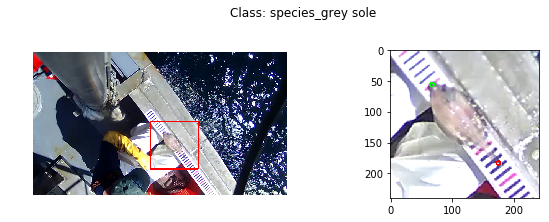

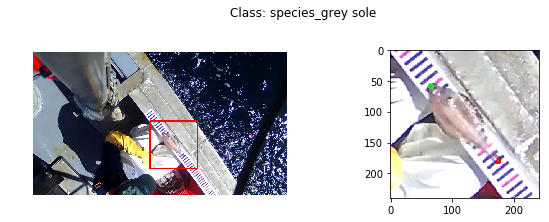

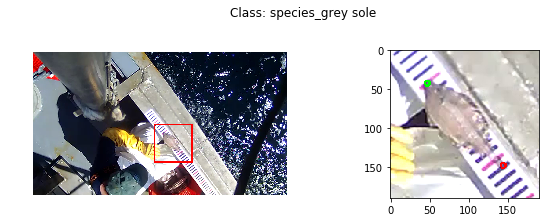

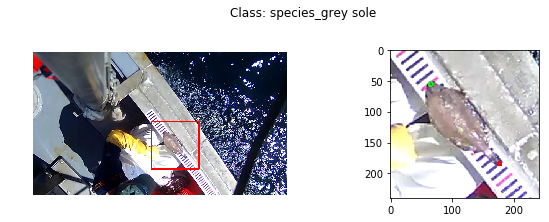

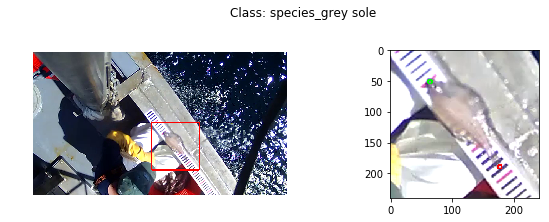

In [35]:
process_video(df, 0, 5)

Total Fish in Video: 49
skip sample at : 10


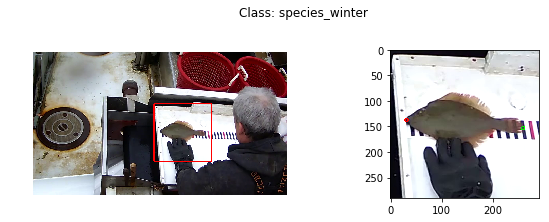

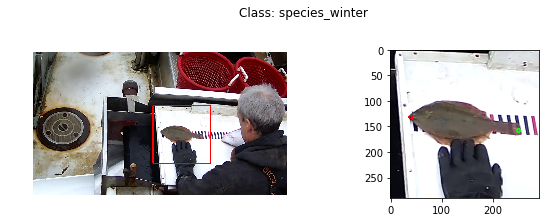

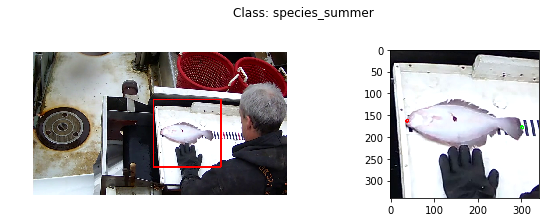

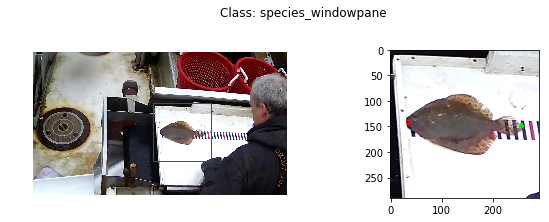

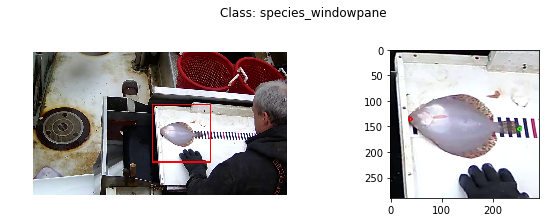

In [36]:
process_video(df, 111, 10)

Total Fish in Video: 56
skip sample at : 10


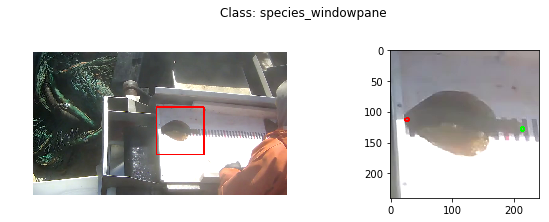

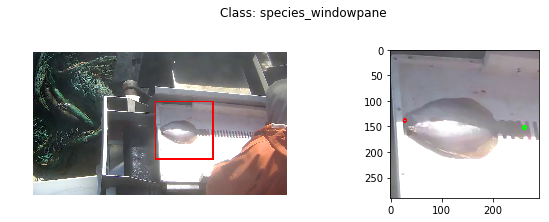

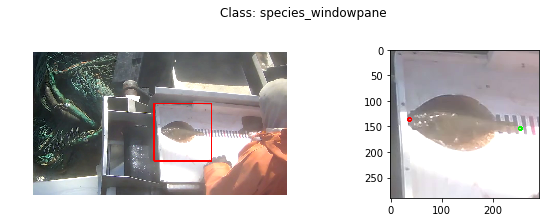

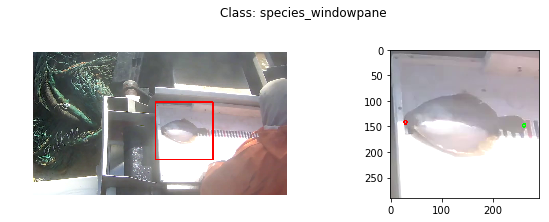

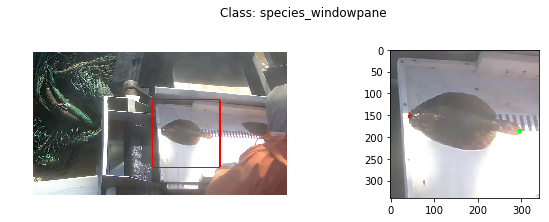

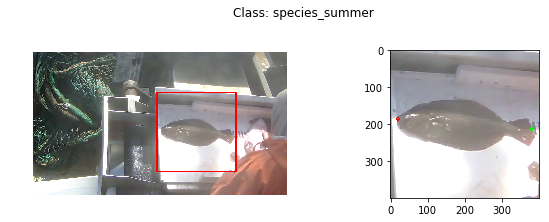

In [37]:
process_video(df, 11, 10)

Total Fish in Video: 23
skip sample at : 10


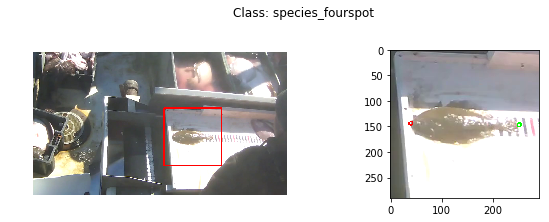

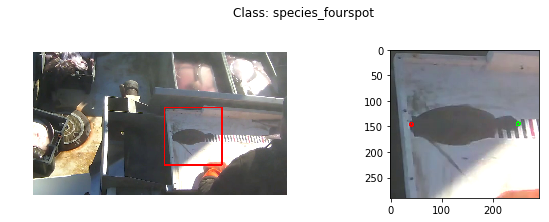

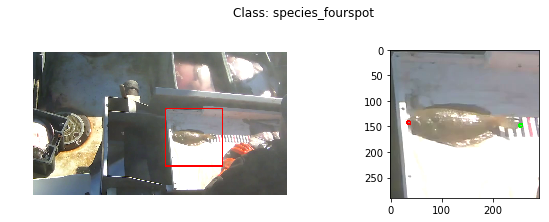

In [38]:
process_video(df, 'JRI97t9Skaiari3h', 10)

Total Fish in Video: 14
skip sample at : 4


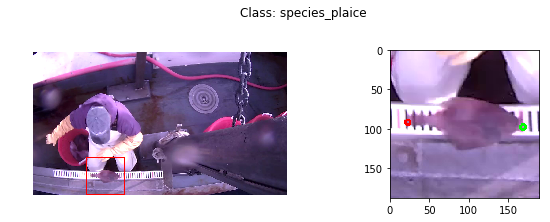

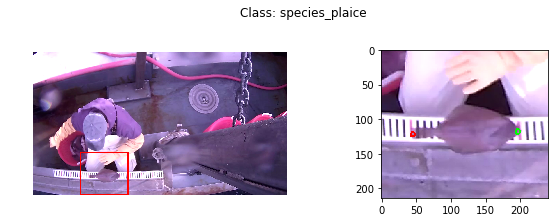

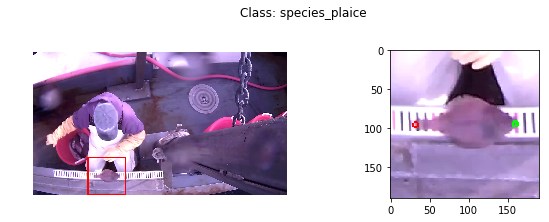

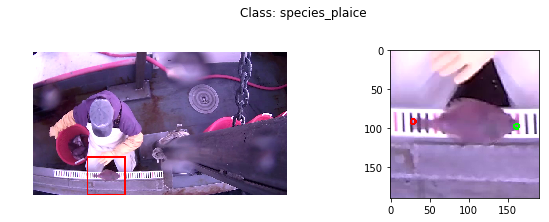

In [41]:
process_video(df, '2lPa7VSrn9ZgsKc0', 4)

Total Fish in Video: 132
skip sample at : 15


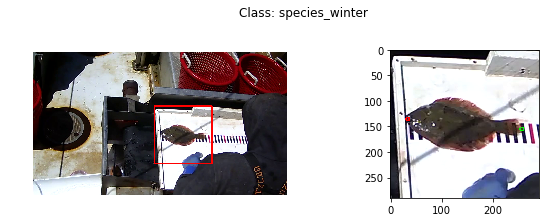

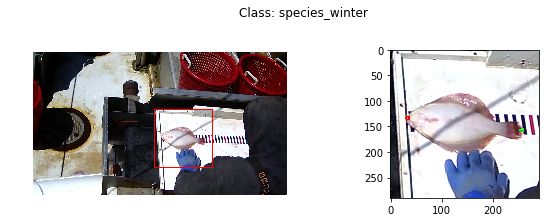

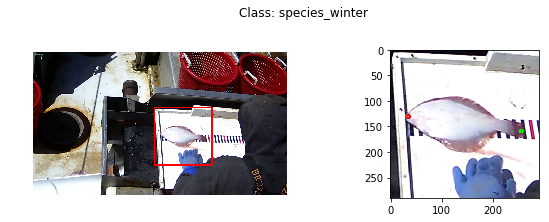

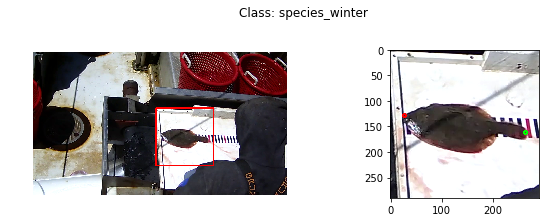

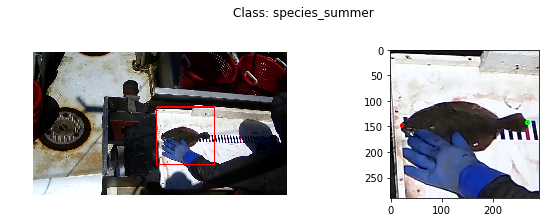

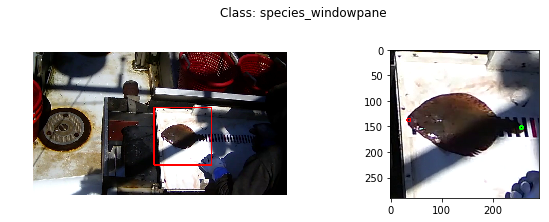

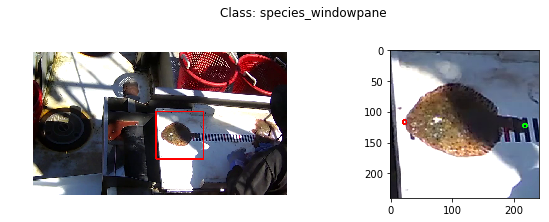

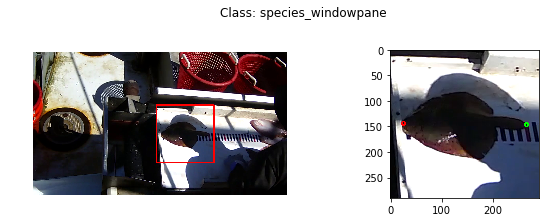

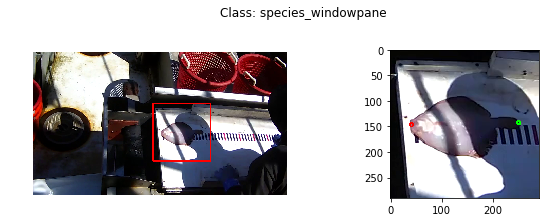

In [44]:
process_video(df, '3QJEa8JchQ6vT5Uo', 15)

Total Fish in Video: 11
skip sample at : None


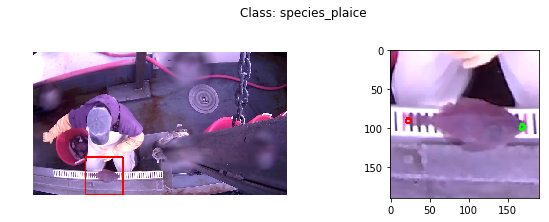

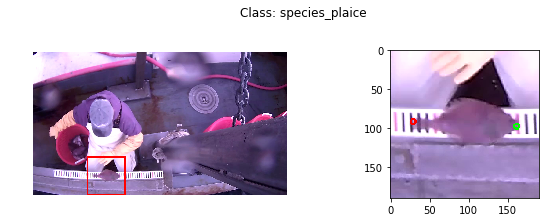

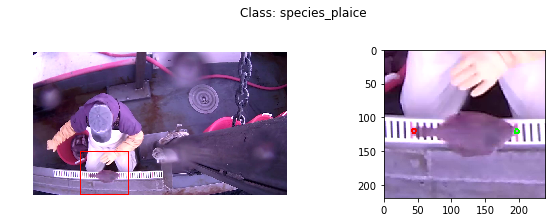

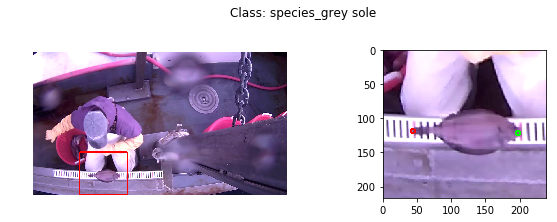

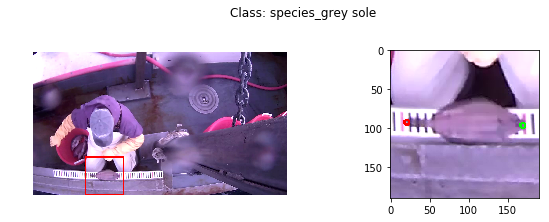

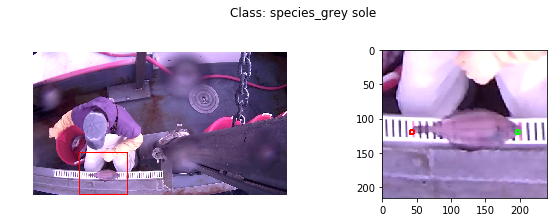

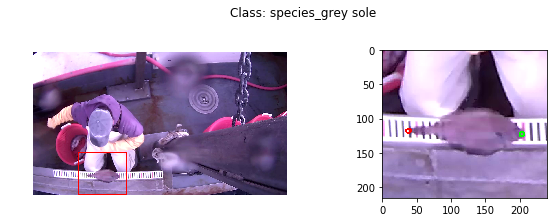

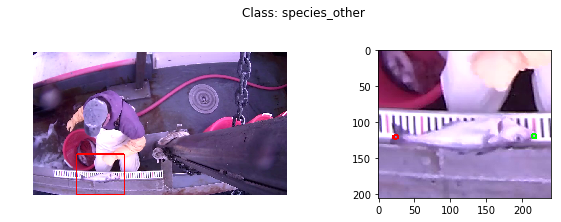

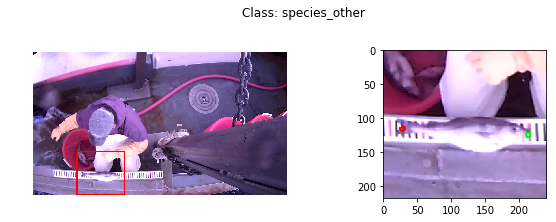

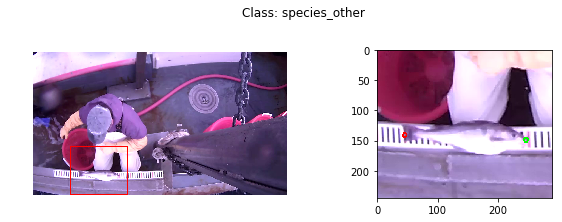

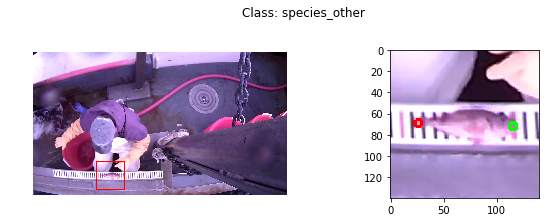

In [49]:
process_video(df, '2OsFoE12GHMAYf3G')

Total Fish in Video: 2
skip sample at : None


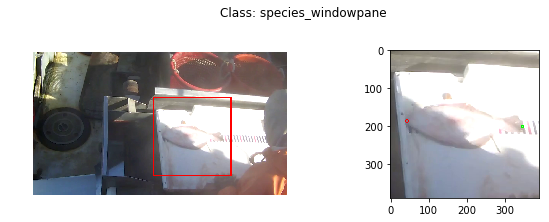

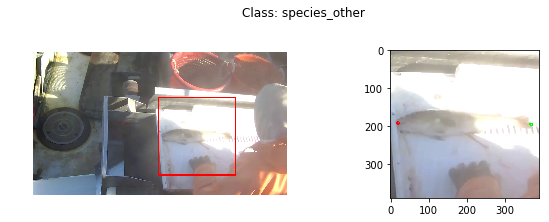

In [47]:
process_video(df, 'GMwJ7MI1XSoB02Ss')

In [45]:
df[df['species_other']==1]['video_id'].unique() 

array(['00WK7DR6FyPZ5u3A', '02p3Yn87z0b5grhL', '06aFbpjpYHVBLJZa',
       '0EmM5wsVVNqaKNaM', '0L5wBDT4CEazgAw6', '0RBt5mjWuPIpTlAq',
       '0S3x7rSjWlcdVULR', '0agWG0Rmk8SIeSsf', '0fI0yACOinj2bEBy',
       '0n671B0EAA03ki6A', '0xJRvZlYaS9MgdGw', '1DNPTfbb4A9cinjB',
       '1GbIwz5YtN1Wd79T', '1OFKjhbUjfIF1oVD', '1aC5AlTbaTyL1cd0',
       '1m4CexFtjZkfB7Ok', '1s9QttADRW2ftUPB', '2BOHn5mxQw2zUPKQ',
       '2OTDd59IGNgAc5mp', '2OXmbk96ryat0j4o', '2OsFoE12GHMAYf3G',
       '2UDdulFeVFHqF4um', '2nM39Bte2bhQQI0R', '34e1be098BciBrwB',
       '36DZly7KCdHA1ARL', '37JFPZxnRinGHLC1', '3CQpNbbfjyfu6Imt',
       '3EeYHibzESZSl2mI', '3QJEa8JchQ6vT5Uo', '3Rfd2JyDZq8elFbZ',
       '3UvmmKLu6AjW12L4', '3ZztYZ5HAZMPXbAS', '3cgG5F09AfzTImM4',
       '3l5nY91sU1SMCtlt', '3l8PDz7HXZW1T7zE', '3ooX7fh7NzPSzhhN',
       '3rS9OnbcLiOO5Jau', '48FPe90Y5c3STvel', '4IP83ZpC040lKRFI',
       '4NCukDSWzGp1XEku', '4NhW1eXSsvKNaSER', '4Zgr1BmaffX3LOLE',
       '4dUnLM3j6Td9LIip', '4xJEbOAEDEu6Og77', '4xdqBa6oTTbpSZ